## Imports and useful funcs

In [6]:
runs_folder = 'Macro_TESA_Lin7'


In [7]:
from torch.utils.data import DataLoader
from Solvation_1.my_nets.Create_dataset import *
from Solvation_1.Vectorizers.vectorizers import *
from Solvation_1.my_nets.LinearNet import *
from Solvation_1.my_nets.net_func import *


## Create dataset

In [8]:
table_v1 = pd.read_table(project_path('Solvation_1/Tables/SS_table_v3.tsv'))
dataset = SS_Dataset(table_v1, 'solvent_macro_props1', 'solute_TESA', normalize=(True, True, True))
len_data = dataset.__len__()
val_data = len_data // 10
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [len_data - val_data, val_data])

solvent_table = pd.read_table(project_path('Solvation_1/Tables/solvent_test_table_v3.tsv'))
solute_table = pd.read_table(project_path('Solvation_1/Tables/solute_test_table_v3.tsv'))
solvent_test_dataset = SS_Dataset(solvent_table, 'solvent_macro_props1', 'solute_TESA', normalize=(True, True, True))
solute_test_dataset = SS_Dataset(solute_table, 'solvent_macro_props1', 'solute_TESA', normalize=(True, True, True))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

solvent_test_loader = DataLoader(solvent_test_dataset, batch_size=46, shuffle=False)
solute_test_loader = DataLoader(solute_test_dataset, batch_size=64, shuffle=False)

length-> S: 2529, U: 2529, G: 2529
S: (tensor([ 0.0656,  0.2982,  0.2228, 24.6910, 28.1419,  0.3204,  0.2254]), tensor([ 1.4262,  0.1996,  0.2314, 48.5389, 17.9622,  0.1575,  0.0863]))
U: (tensor([46.2081, 23.2195, 32.6769, 33.9146,  2.0706,  6.2217,  6.3596,  1.3146,
         7.2285]), tensor([9.9636e+01, 3.6870e+01, 6.2343e+01, 3.6324e+01, 1.6689e-01, 2.7655e+00,
        2.3217e+00, 7.2206e-02, 2.0575e+00]))
G: (tensor([2.8032], dtype=torch.float64), tensor([-5.1549], dtype=torch.float64))
length-> S: 2529, U: 2529, G: 2529
S: (tensor([ 0.0656,  0.2982,  0.2228, 24.6910, 28.1419,  0.3204,  0.2254]), tensor([ 1.4262,  0.1996,  0.2314, 48.5389, 17.9622,  0.1575,  0.0863]))
U: (tensor([46.2081, 23.2195, 32.6769, 33.9146,  2.0706,  6.2217,  6.3596,  1.3146,
         7.2285]), tensor([9.9636e+01, 3.6870e+01, 6.2343e+01, 3.6324e+01, 1.6689e-01, 2.7655e+00,
        2.3217e+00, 7.2206e-02, 2.0575e+00]))
G: (tensor([2.8032], dtype=torch.float64), tensor([-5.1549], dtype=torch.float64))
length

In [9]:
print(dataset.norm_params)

{'Solvent': (tensor([ 0.0656,  0.2982,  0.2228, 24.6910, 28.1419,  0.3204,  0.2254]), tensor([ 1.4262,  0.1996,  0.2314, 48.5389, 17.9622,  0.1575,  0.0863])), 'Solute': (tensor([46.2081, 23.2195, 32.6769, 33.9146,  2.0706,  6.2217,  6.3596,  1.3146,
         7.2285]), tensor([9.9636e+01, 3.6870e+01, 6.2343e+01, 3.6324e+01, 1.6689e-01, 2.7655e+00,
        2.3217e+00, 7.2206e-02, 2.0575e+00])), 'G': (tensor([2.8032], dtype=torch.float64), tensor([-5.1549], dtype=torch.float64))}


## Train Network

In [10]:
x, y = next(iter(dataset))
x.shape

torch.Size([1, 16])

In [11]:
in_feat = next(iter(dataset))[0].shape[-1]
verbose = False
model = LinearNet3(in_features = in_feat)
loss_function = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters())
model.train()

MSE = train(model,train_loader, val_loader, solvent_test_loader, solute_test_loader, loss_function, optimizer, epochs=12, ckp_path=runs_folder)

100%|██████████| 27/27 [00:00<00:00, 29.33it/s]


/Users/balepka/PycharmProjects/msuAI/Solvation_1/../Solvation_1/Runs/Macro_TESA_Lin7/ep_0.pt
Validation loss decreased (10000000000000000.000000 --> 0.404217).  Saving model ...
/Users/balepka/PycharmProjects/msuAI/Solvation_1/../Solvation_1/Runs/Macro_TESA_Lin7/ep_0.pt
epoch 0 -> 0.4042169451713562


100%|██████████| 27/27 [00:00<00:00, 30.42it/s]


/Users/balepka/PycharmProjects/msuAI/Solvation_1/../Solvation_1/Runs/Macro_TESA_Lin7/ep_5.pt
Validation loss decreased (0.404217 --> 0.228543).  Saving model ...
/Users/balepka/PycharmProjects/msuAI/Solvation_1/../Solvation_1/Runs/Macro_TESA_Lin7/ep_5.pt
epoch 5 -> 0.22854255139827728


100%|██████████| 27/27 [00:00<00:00, 30.37it/s]


/Users/balepka/PycharmProjects/msuAI/Solvation_1/../Solvation_1/Runs/Macro_TESA_Lin7/ep_10.pt
Validation loss decreased (0.228543 --> 0.179798).  Saving model ...
/Users/balepka/PycharmProjects/msuAI/Solvation_1/../Solvation_1/Runs/Macro_TESA_Lin7/ep_10.pt
epoch 10 -> 0.17979808151721954


100%|██████████| 27/27 [00:00<00:00, 30.81it/s]


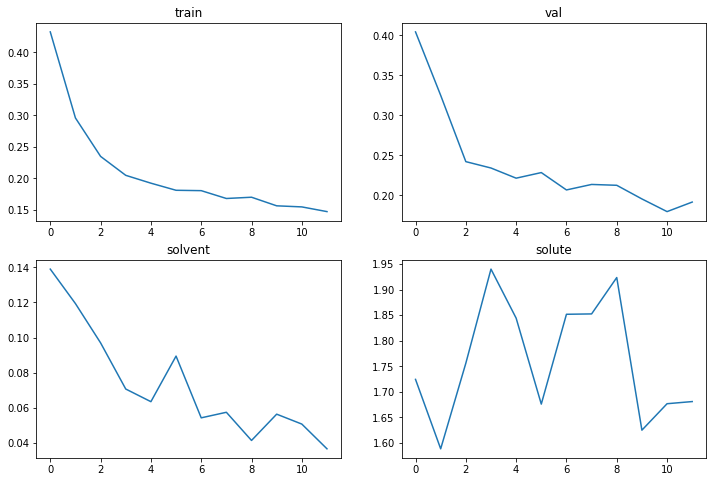

In [12]:

plot_losses(project_path('Solvation_1/Runs/Macro_TESA_Lin7/run_log.tsv'))

solvent water
solute ethanol


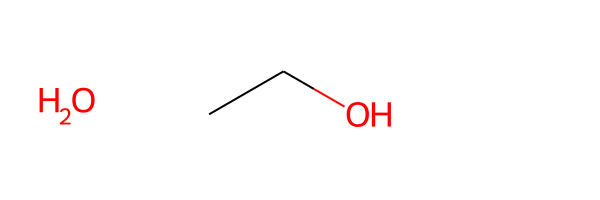

predicted 10.224753379821777, true -5.010000228881836


In [13]:
beautiful_sample(model, 'water', 'ethanol')